In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

**Задача 1**

Загрузить файл hr.csv

In [2]:
data=pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Задача 2**

Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
mode_number_project = data.number_project.mode()
print('Мода для количества выполненных проектов ', mode_number_project)

Мода для количества выполненных проектов  0    4
dtype: int64


**Задача 3**

Рассчитать и визуализировать корреляционную матрицу для переменных.

In [6]:
corr = data.corr(method="pearson")
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


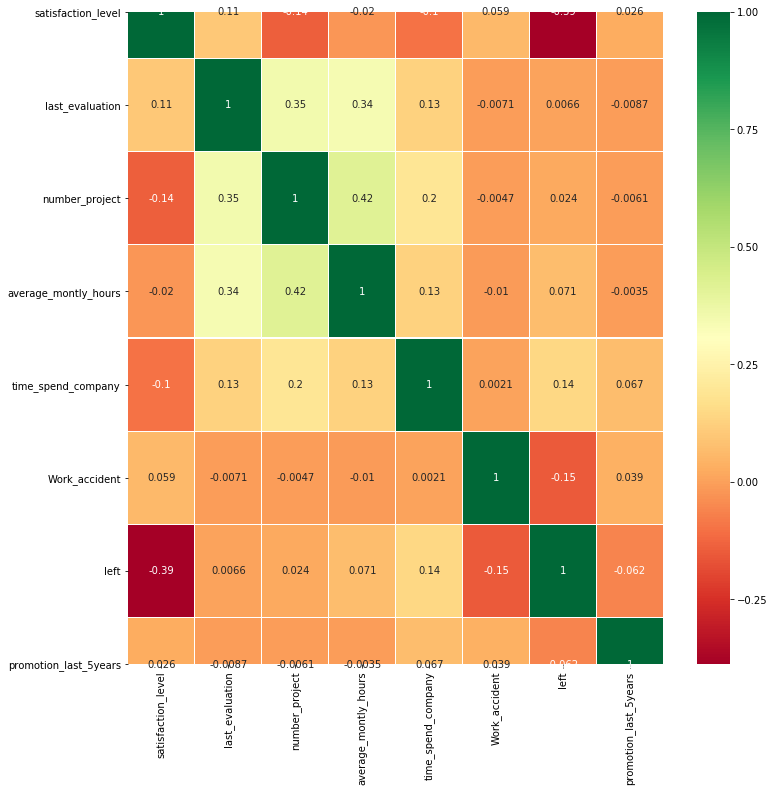

In [7]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

**Вывод:**

Корреляционная матрица показывает взаомосвязь признаков, полученные коэффициенты говорят о том, что связь между признаками не особо сильная, из полученных наиболее интеренсный факт, что наблюдается обратаная статистическая связь, между уровнем удовлетворенности и уходои сотрудников (уровень удовлетворености ниже у тех кто ушел), прямая статистическая зависимость между  средними часами в месяц и последней оценкой сотрудника и количеством проектов, т.е. получается чем больше у сотрудника проектов, тем больше он работает и выше его оценка. Выводы из серии "Капитан очевидность"!

**Задача 4**

Визуализировать несколько взаимосвязей между переменными.

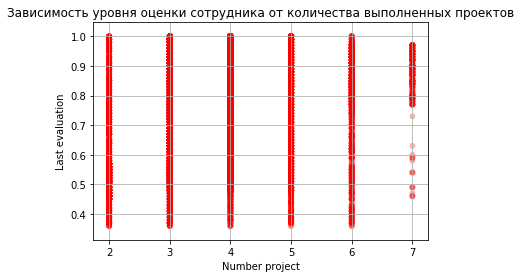

In [8]:
Number_project = data['number_project']
Last_evaluation = data['last_evaluation']
fig, ax = plt.subplots()
ax.scatter(Number_project, Last_evaluation, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Number project')
plt.ylabel('Last evaluation')
plt.title('Зависимость уровня оценки сотрудника от количества выполненных проектов')
plt.show()

**Вывод**

Диаграмма рассеивания показывает, что уровеннь оценки от количества не очень то и зависит, можно потратить все свое время на один проект и выполнить его плохо, а можно выполнить 6 проектов на высоком уровне, исключение составляют сотрудники выполняющие 7  проектов, видимо это профессионалы со стабильно высокими показателями!

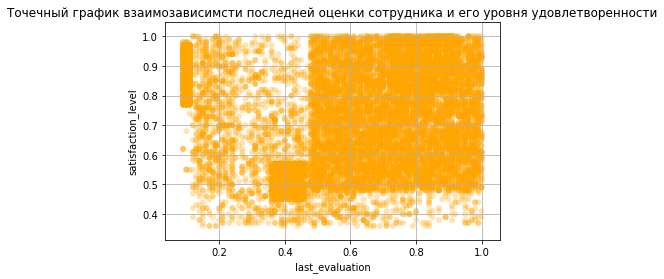

In [9]:
last_evaluation = data['last_evaluation']
satisfaction_level = data['satisfaction_level']
fig, ax = plt.subplots()
ax.scatter(satisfaction_level, last_evaluation, c='orange', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('last_evaluation')
plt.ylabel('satisfaction_level')
plt.title('Точечный график взаимозависимсти последней оценки сотрудника и его уровня удовлетворенности')
plt.show()

**Вывод**

Наблюдается прямая статистическая зависимость, чем выше оценка сотрудника, тем выше его удовлетворенность, но есть интересный сгусток точек на диаграмме, сотрудники с очень низкой оценкоц имеют практически максимальный уровень удовлетворенности, видимо новички, еще нечего не умеют толком, но работа нравится и они горят желанием совершенствоваться!

**Задача 5**

С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [10]:
satisfaction_leve_left_1 = data[data['left'] == 1]['satisfaction_level']

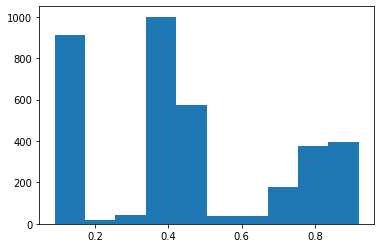

In [11]:
fix, ax = plt.subplots()
ax.hist(data.loc[data['left']==1, 'satisfaction_level'])
plt.show()

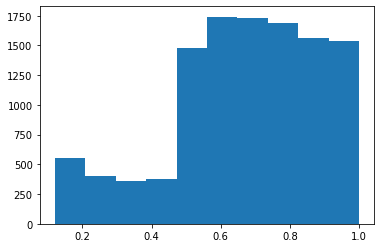

In [12]:
fix, ax = plt.subplots()
ax.hist(data.loc[data['left']==0, 'satisfaction_level'])
plt.show()

In [13]:
satisfaction_leve_left_0 = data[data['left'] == 0]['satisfaction_level']

In [14]:
print(stats.ttest_ind(satisfaction_leve_left_1, satisfaction_leve_left_0))

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)


**Вывод**

p-value равно 0, что намного меньше стандартной альфа ошибки 0.05, поэтому мы принимаем конкурирующую гипотезу и можем сказать, что имеется статистическое различие между показателем удовлетворенности у работающих и уволившихся сотрудников.

**Задание 6**

Рассчитать сколько работников работает в каждом департаменте

In [15]:
ds0 = data['sales'].value_counts()
ds0

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

**Результат**

С помощью метода value_counts() мы получили распределение работников по департаментам, так пнапример в отделе продаж работает больше всего сотрудников, а именно 4140 человек, далее следует технический отдел с количеством сотрудников в 2720 человек и так далее!

**Задача 7**

**Распределение сотрудников по зарплатам**

In [16]:
ds = data['salary'].value_counts()
ds

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

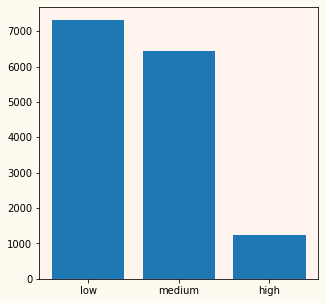

In [17]:
fig, ax = plt.subplots()

x = ds.index
y = ds.values

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(5)    #  ширина Figure
fig.set_figheight(5)    #  высота Figure

plt.show()

**Результат**

Диаграмм отражает распределение зарплат, более 7000 человек имеют невысокую заработную плату, более 6000 среднюю и около 1000 человек получают высокую заработную плату, почти как в жизни!

**Задача 8**

Показать распределение сотрудников по зарплатам совместно с департаментами

In [18]:
data1 = data.groupby(['salary','sales'])['last_evaluation'].aggregate('count').unstack()
data1

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

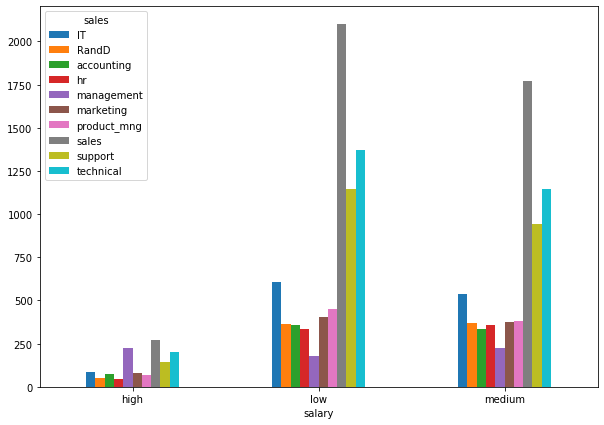

In [20]:
data1.plot(kind='bar', rot = 0)

**Результат**

Мы видим, что в во всех отделах присутствуют люди с разными уровнями зарплат, у менеджеров доля лиц получающих высокую заработную плату больше чем в других отделах, распределение средних и низких зарплат очень похожи!

**Задача 9**

**Сколько сотрудников покинуло компанию?**

In [21]:
print(len(data[data['left']==1]),'cотрудников покинули компанию')

3571 cотрудников покинули компанию


**Задание 10**

Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [22]:
data1 = data[data['left'] == 0]

In [23]:
data1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [24]:
data2 = data[data['left'] == 1]

In [25]:
data2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [26]:
print('Доля сотркдников получивших повышение среди работающих сотрудников ',\
      len(data1[data1['promotion_last_5years']==1])*100/data1.promotion_last_5years.count())

Доля сотркдников получивших повышение среди работающих сотрудников  2.625131256562828


In [28]:
print('Вывод : Доля сотрудников получивших повышение среди уволившихся сотрудников ',\
    len(data2[data2['promotion_last_5years']==1])*100/data2.promotion_last_5years.count())

Вывод : Доля сотрудников получивших повышение среди уволившихся сотрудников  0.5320638476617194


Как проверить статистическую значимость различия данных показателей к сожалению не нашла! 